# Plotting data
--------------------------------------------------------------------------------------------------------------------------------

In this notebook, you will learn about:
 - [data plotting](#Data-plotting) using the module __*Matplotlib*__ (installed by default in Anaconda).

# Data plotting

We will use __*Matplotlib*__ for plotting data, it is a really powerful library. [__*Matplotlib*__ website](https://matplotlib.org/) states:
> "*Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.*"

In the website you can find out more about __*Matplotlib*__, its capabilities, as well as useful examples and tutorials. 

In this notebook, we will use an aircraft's lift and drag force dependance on flight speed as an example to understand the use of __*Matplotlib*__. Recall that the aircraft's lift and drag equations are given by:
$$
L = \frac{1}{2} \rho V^2 S C_L\\
D = \frac{1}{2} \rho V^2 S C_D
$$
where $L$ is the lift force, $D$ is the drag force, $\rho$ is the air density, $V$ is the flight speed, $S$ is the aircraft's wing reference area, $C_L$ is the lift force coefficient and $C_D$ is the drag force coefficient.

The code below defines two functions to compute these forces.

In [62]:
def compute_lift_force(V, S, CL, rho):
    
    # Lift force computation
    L = 1/2*(rho*V**2*S*CL)
    
    # Return result
    return L

def compute_drag_force(V, S, CD, rho):
    
    # Drag force computation
    D = 1/2*(rho*V**2*S*CD)
    
    # Return result
    return D

The functions above require $V$, $S$, $\rho$, $C_L$ and $C_D$ as inputs. Let's define these below.

In [63]:
# Physical constants
g = 9.81    # Earth's gravitational acceleration, [m/s^2]
rho = 1.225 # Air density at mean sea level, [kg/m^3]

# Aircraft's wing geometric characteristics
b = 1.8        # Wing span, [m]
AR = 8.2       # Wing aspect ratio
S = (b**2)/AR  # Wing reference area, [m^2]

# Aircraft's mass, [kg]
m = 2.5
# Compute aircraft's weight [N]
W = m*g

# Aircraft's flight speed, m/s
V = 18

# Aircraft's lift and drag coefficients
CL = W/(0.5*rho*(V**2)*S)
CD = 0.099

Now, import the NumPy library

In [64]:
import numpy as np

Now, let's create an array __*velocity_array*__ containing 7 values for $V$, ranging from $8\, m/s$ to $32\, m/s$ in steps of $4\, m/s$.

In [65]:
velocity_array = np.array([8,12,16,20,24,28,32])

Now using the lift and drag functions defined above, let's compute corresponding lift and drag force arrays.

In [66]:
# Compute lift force array
lift_force_array = compute_lift_force(velocity_array, S, CL, rho)
# Compute drag force array
drag_force_array = compute_drag_force(velocity_array, S, CD, rho)
# Print results to screen
print("The computed lift force array is {} N".format(lift_force_array))
print("The computed drag force array is {} N".format(drag_force_array))

The computed lift force array is [ 4.84444444 10.9        19.37777778 30.27777778 43.6        59.34444444
 77.51111111] N
The computed drag force array is [ 1.53338927  3.45012585  6.13355707  9.58368293 13.80050341 18.78401854
 24.53422829] N


# 7 steps to produce a data plot
Next, let's plot the change in lift and drag force using the __*Matplotlib*__ method __*pyplot*__. To do this, you need to complete the following steps:
 1. From the __*Matplotlib*__ library, import __*pyplot*__. We will use the "alias" __*plt*__.

In [67]:
import matplotlib.pyplot as plt

 2. Minimal set of instructions. Let's start by creating a basic plot of the lift force $L$ against the flight speed $V$. Only three instructions/methods are necessary:
     - __*plt.figure*__, used to create a figure object;
     - __*plt.plot()*__, used to plot an set of x/y data points against each other;
     - and __*plt.show()*__, used to display all open figures.

For more information on the different inputs that __*plt.plot*__ accepts and the various ways in which it can be used visit the [__*matplotlib.pyplot.plot*__ reference page ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

The code below shows how to generate the $L$ vs $V$ plot.

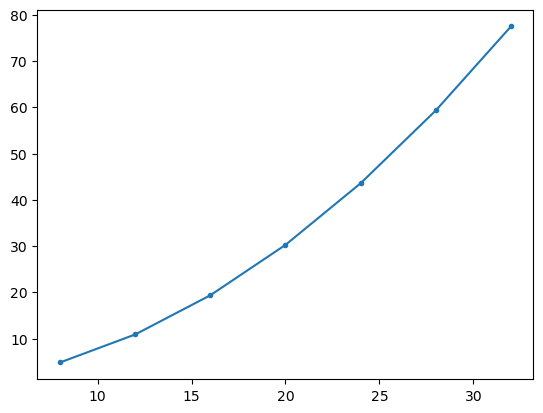

In [68]:
# Create a figure object
plt.figure
# Plot the lift_force_array points against the velocity_array points
#   Note that the '.-' input is a shorthand command that defines:
#     - the marker line as a bullet/dot ('.'),
#     - and the line type as continuos ('-').
plt.plot(velocity_array,lift_force_array,'.-')
# Display all open figures
plt.show()

3. Adding a grid. It's always a good idea to add a grid in the plot to make it easier to read data out of it. This is easily done by adding the instuction __*plt.grid()*__. The code below shows an example of this.

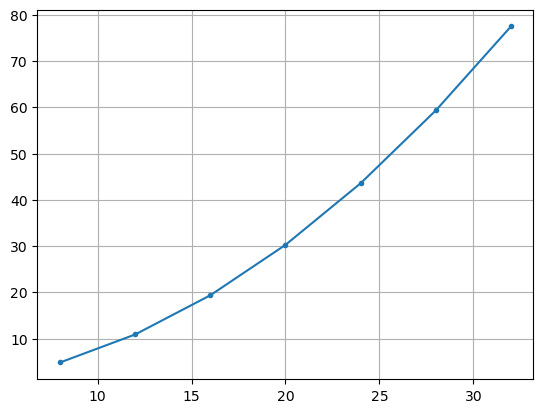

In [69]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-')
# Add grid to plot
plt.grid()
plt.show()

 4. Adding the plot for drag force. Now, let's add the drag force $D$ against the flight speed $V$ plot on top of the previous plot.

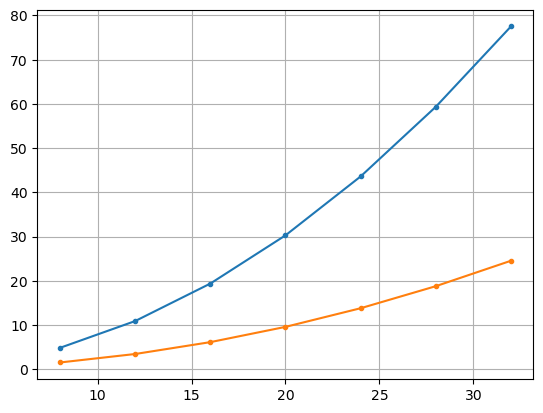

In [70]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-')
# Add the drag_force_array points against the velocity_array points 
plt.plot(velocity_array,drag_force_array,'.-')
plt.grid()
plt.show()

The above graph would be difficult to interpret for someone other that the person(s) generating it. For instance, if you are given only the graph above, how could you tell between the lift force and the drag force curves?

 5. Adding a legend. The simplest way to clearly identify which curve represents either lift force or drag force is to include a legend in the plot. This is achieved by adding:
   - a label input to __*plt.plot*__,
   - and the __*plt.legend()*__ instruction.

The code below shows how to do just that.

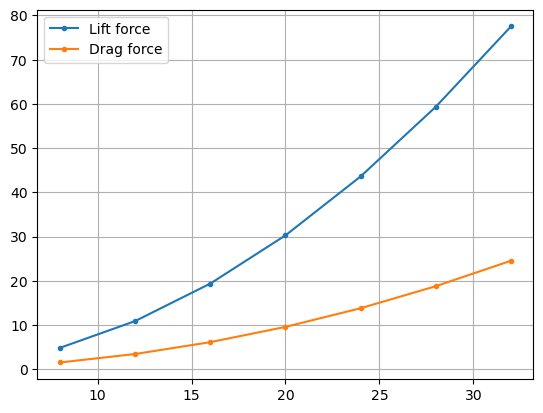

In [71]:
plt.figure
# Add a label for the lift_force_array plot
plt.plot(velocity_array,lift_force_array,'.-',label="Lift force")
# Add a label for the drag_force_array plot
plt.plot(velocity_array,drag_force_array,'.-',label="Drag force")
# Add a legend to the plot
plt.legend()
plt.grid()
plt.show()

The above graph is now easier to interpret. However, for the graph above, how could you tell which axis corresponds to the lift/drag force and which one corresponds to the flight speed? Also, which are the units of measurement?
 
 6. Adding a label for the X-axis. Adding a descriptive label to the X-axis with the right information would address this questions.
 
 The code below shows how to generate the X-axis label.

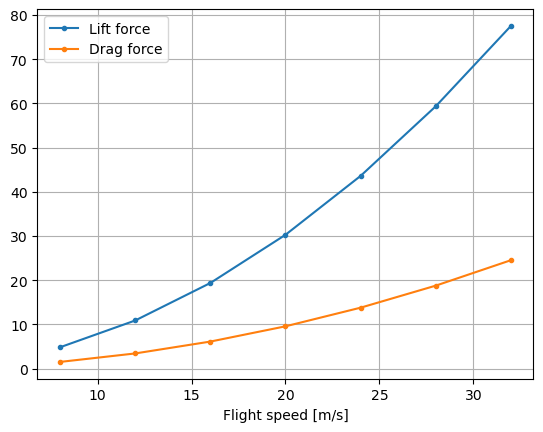

In [72]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-',label="Lift force")
plt.plot(velocity_array,drag_force_array,'.-',label="Drag force")
# Add a X-axis label
plt.xlabel("Flight speed [m/s]")
plt.legend()
plt.grid()
plt.show()

7. Adding a label for the Y-axis. In a similar fashion you can add a label to the Y-axis.

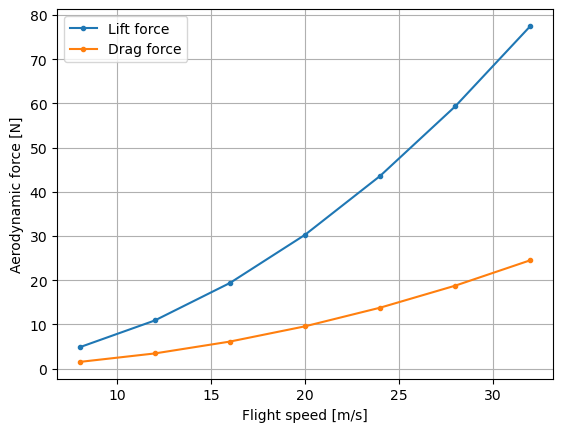

In [73]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-',label="Lift force")
plt.plot(velocity_array,drag_force_array,'.-',label="Drag force")
plt.xlabel("Flight speed [m/s]")
# Add a Y-axis label
plt.ylabel("Aerodynamic force [N]")
plt.legend()
plt.grid()
plt.show()

Now, when comparing the resulting plot/graph above witht the initial one, you can see that the final graph presents the data in a clearer, more accesible, more professional and easier to read fashion. 

### Additional material to cover on your own and at your own pace

You might want to continue exploring some of the embedded functions/methods that are available when working with __*Matplotlib*__. I suggest trying the following:
- change the marker type used for the lift and drag forces (e.g., a star for lift and a cross for the drag),
- change the line style/colour used for the lift and drag forces (e.g., interrupted line for lift/dotted line for the drag, black colour line for lift/ red colour line for drag),
- change the plot limits of the X/Y-axes.